# Gold Price Prediction Project

**Objective:**

This project aims to predict the price of gold using various economic indicators. The dataset contains historical data on several financial variables such as the S&P 500 Index (SPX), the price of crude oil (USO), the price of silver (SLV), and the EUR/USD exchange rate. The goal is to understand the relationship between these variables and the price of gold (GLD) and to build a predictive model that can accurately forecast the price of gold.

**Overview of the Process:**

1. Data Collection:

 * Importing the dataset containing economic indicators and gold prices
 .

2. Data Analysis and Preprocessing:

 * Examined dataset structure and summarized key statistics.
 * Checked for and handled any missing values.
 * Performed correlation analysis to understand relationships between features.
 * Visualized the distribution of the gold price (GLD).

3. Feature Selection:

 * Selected relevant features (SPX, USO, SLV, EUR/USD) and the target variable (GLD).

4. Model Training:

 * Split the data into training and testing sets.
 * Trained a Random Forest Regressor model on the training data.

5. Model Evaluation:

 * Evaluated the model's performance on both training and test data using R2 score and Mean Absolute Error (MAE).
 * Visualized and compared the actual vs. predicted prices for both training and test data.

6. Predictive System:

 * Developed a system to predict gold prices based on input economic indicators using the trained model.

Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error

### **1. Data Collection**

In [ ]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

[Link to dataset](https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data)

### **2. Data Analysis and Preprocessing**

In [ ]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
#correlation
correlation = gold_data.iloc[:,1:].corr()

<Axes: >

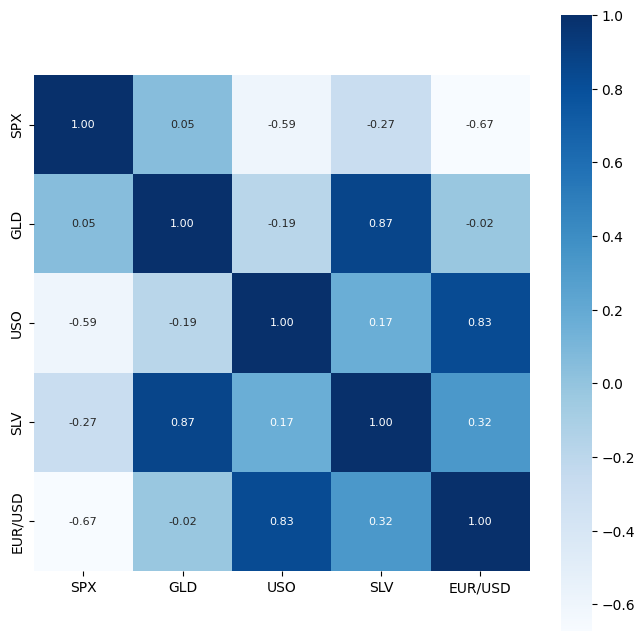

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


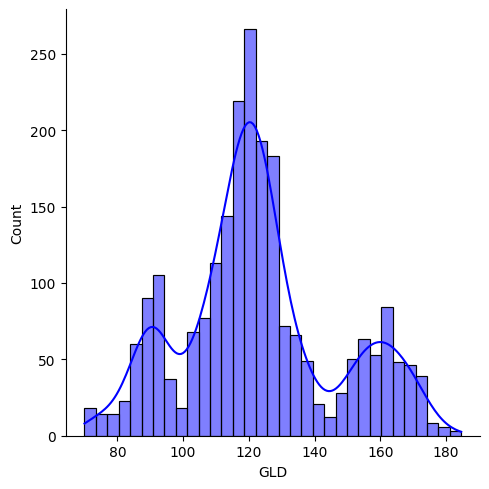

In [ ]:
# checking the distribution of the GLD Price
sns.displot(gold_data['GLD'],kde=True,color='blue')

### **3. Feature Selection**

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


### **4. Model Training**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [ ]:
regressor = RandomForestRegressor()

In [ ]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

### **5. Model Evaluation**

In [ ]:
# Evaluation on training data
train_data_prediction = regressor.predict(X_train)

print('R2 score :',r2_score(Y_train,train_data_prediction))

print('Mean Absolure Error :',mean_absolute_error(Y_train,train_data_prediction))

R2 score : 0.9984515061282629
Mean Absolure Error : 0.48667226685589526


In [ ]:
#Visualizing and Comparing the Actual Values and Predicted Values
Y_train = list(Y_train)

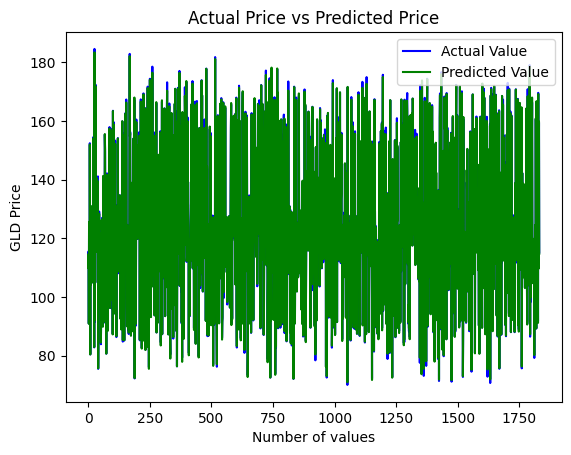

In [ ]:
plt.plot(Y_train, color='blue', label = 'Actual Value')
plt.plot(train_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

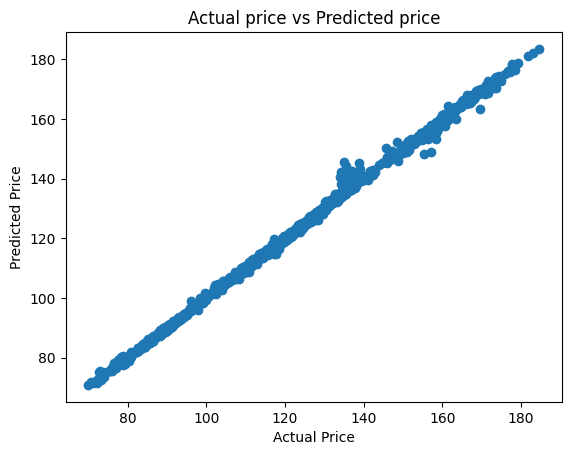

In [ ]:
plt.scatter(Y_train,train_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual price vs Predicted price")
plt.show()

In [ ]:
# Evaluation on test data
test_data_prediction = regressor.predict(X_test)

print('R2 score :',r2_score(Y_test,test_data_prediction))

print('Mean Absolure Error :',mean_absolute_error(Y_test,test_data_prediction))

R2 score : 0.9891654000936714
Mean Absolure Error : 1.3271532456768493


In [ ]:
#Visualizing and Comparing the Actual Values and Predicted Values
Y_test = list(Y_test)

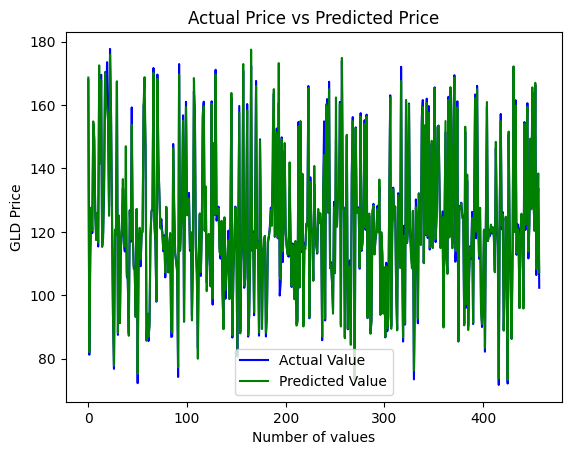

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

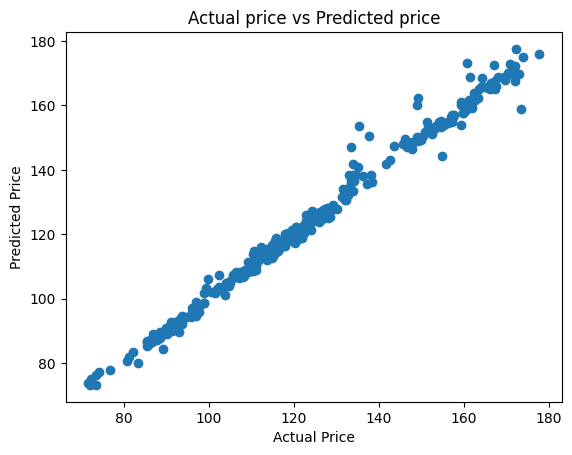

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual price vs Predicted price")
plt.show()

6. Predictive System

In [ ]:
def predict_Gld_price(SPX,USO,SLV,EUR_USD):
  input_data = np.array([SPX,USO,SLV,EUR_USD])
  input_data = input_data.reshape(1,-1)
  df_input_data = pd.DataFrame(input_data,columns=X.columns)
  price_pred = regressor.predict(df_input_data)
  print('Price :',round(price_pred[0],2),'$')

In [ ]:
predict_Gld_price(1373.199951,71.849998,15.654,1.466405)

Price : 86.91 $
